## Step 1: EDA

In [1]:
## load required packages
import pandas as pd
import numpy as np 
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
## Load the data and check
import os 
os.chdir(r'D:\Dataset\Side_project_Video_Game_Sales')
print(os.getcwd())

games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(games.head())

print(games.info())

print(games.isnull().any())

os.chdir(r'D:\Project\Side_project_Video_Game_Sales')

D:\Dataset\Side_project_Video_Game_Sales
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: Platform, dtype: int64


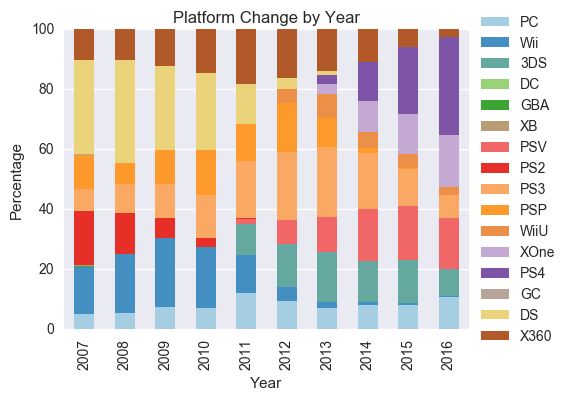

In [3]:
## Column: Platform
print(games.Platform.value_counts()[:10])

# Visualization: the change of platforms by years
games_yr = games.groupby(['Year_of_Release'])
#print(games_yr['Platform'].value_counts())
year_index = [float(x) for x in range(2007, 2017)]
plat_index = []
for year in year_index:
    plat_index.extend(list(games_yr['Platform'].value_counts()[year].index))
plat_index = list(set(plat_index))
# create the data frame for platforms and years
plat_year = pd.DataFrame(columns=year_index, index=list(set(plat_index)))
for year in year_index:
    plat_year[year] = games_yr['Platform'].value_counts()[year]
plat_year.columns = [str(int(x)) for x in year_index]
# fill the NAs as 0
plat_year.fillna(0)
# calculate the percentage for each platform in each year
plat_year_perc = plat_year.apply(lambda x: x/np.sum(x)*100, axis=0)
# plotting
plt.figure(figsize=[20, 20])
plat_year_perc.transpose().plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none')
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Platform Change by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.ylim([0, 100])
plt.savefig('Platform_change_by_year.png', dpi=300)

0           Sports
1         Platform
2           Racing
3           Sports
4     Role-Playing
5           Puzzle
6         Platform
7             Misc
8         Platform
9          Shooter
10      Simulation
11          Racing
12    Role-Playing
13          Sports
14            Misc
15          Sports
16          Action
17          Action
18        Platform
19            Misc
20    Role-Playing
21        Platform
22        Platform
23          Action
24          Action
25    Role-Playing
26          Puzzle
27    Role-Playing
28          Racing
29         Shooter
          ...     
70         Shooter
71        Platform
72            Misc
73      Simulation
74            Misc
75    Role-Playing
76          Racing
77          Sports
78         Shooter
79            Misc
80            Misc
81          Action
82         Shooter
83    Role-Playing
84    Role-Playing
85      Simulation
86          Sports
87         Shooter
88    Role-Playing
89          Puzzle
90    Role-Playing
91          

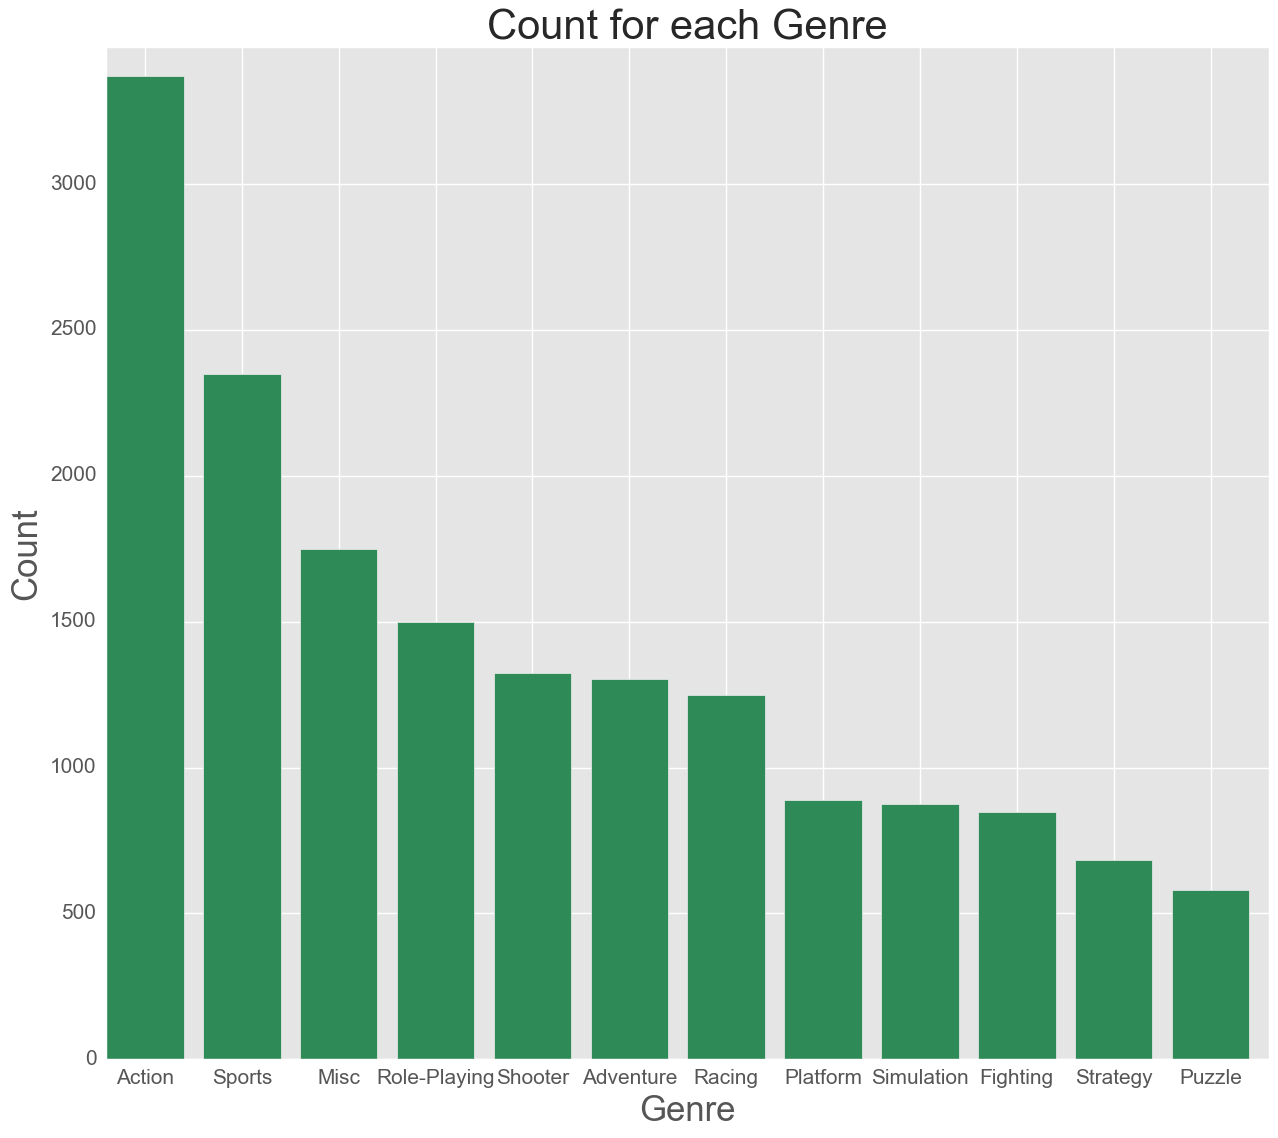

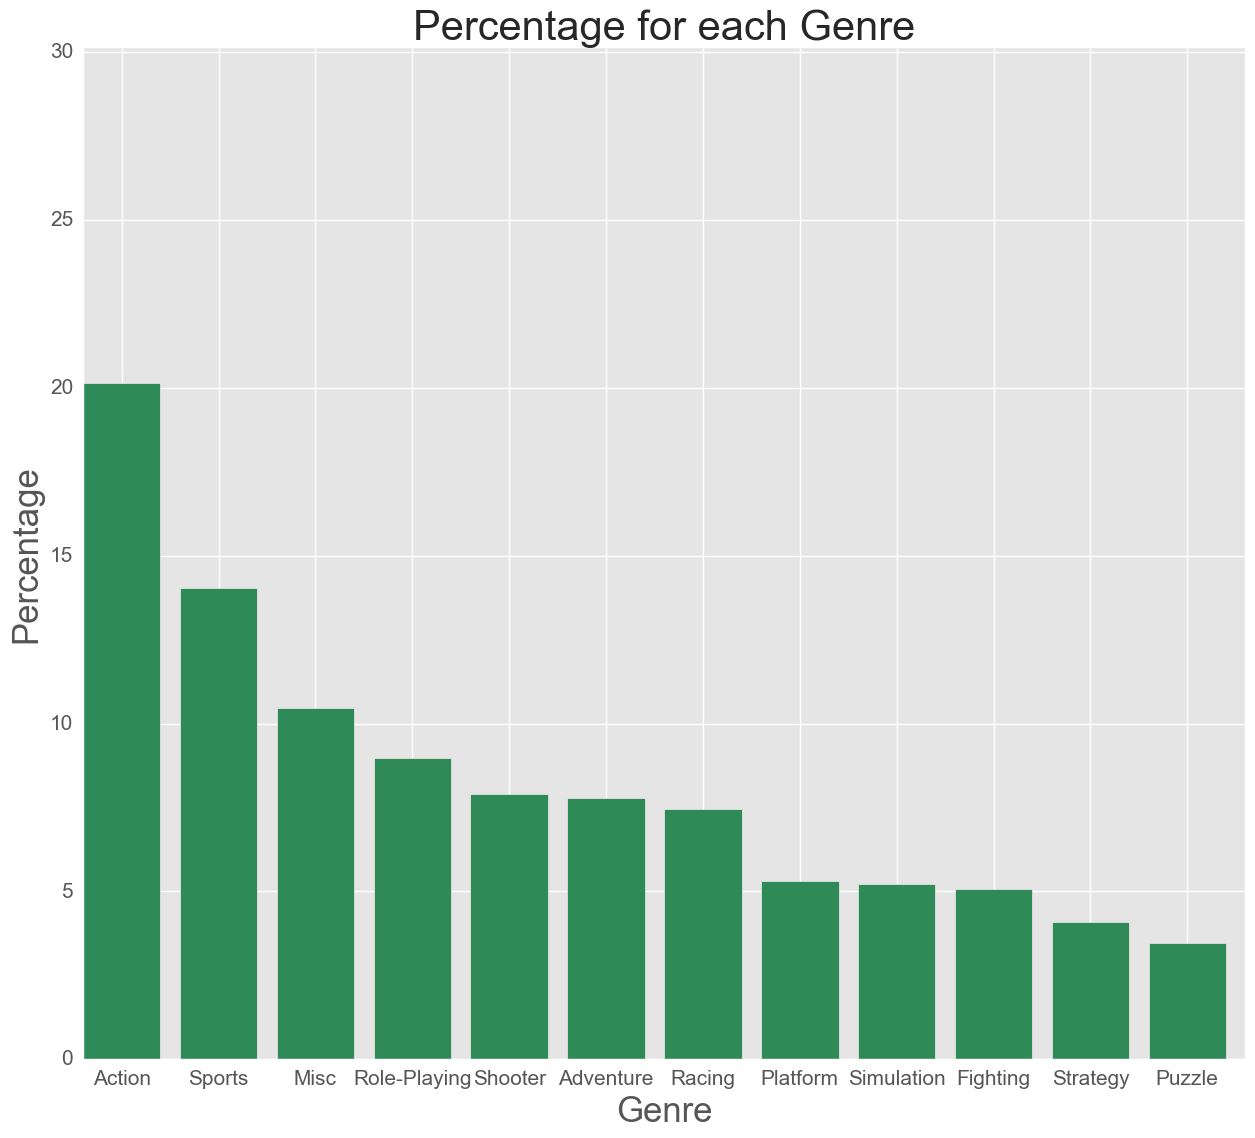

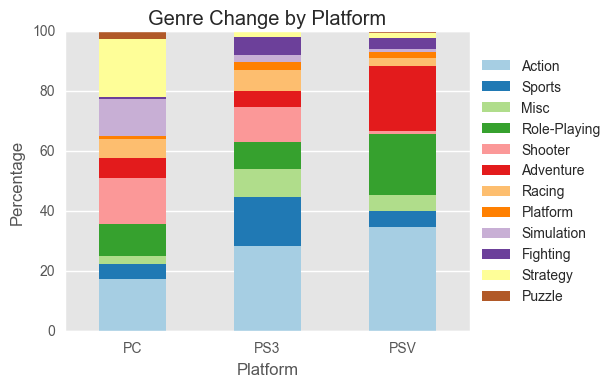

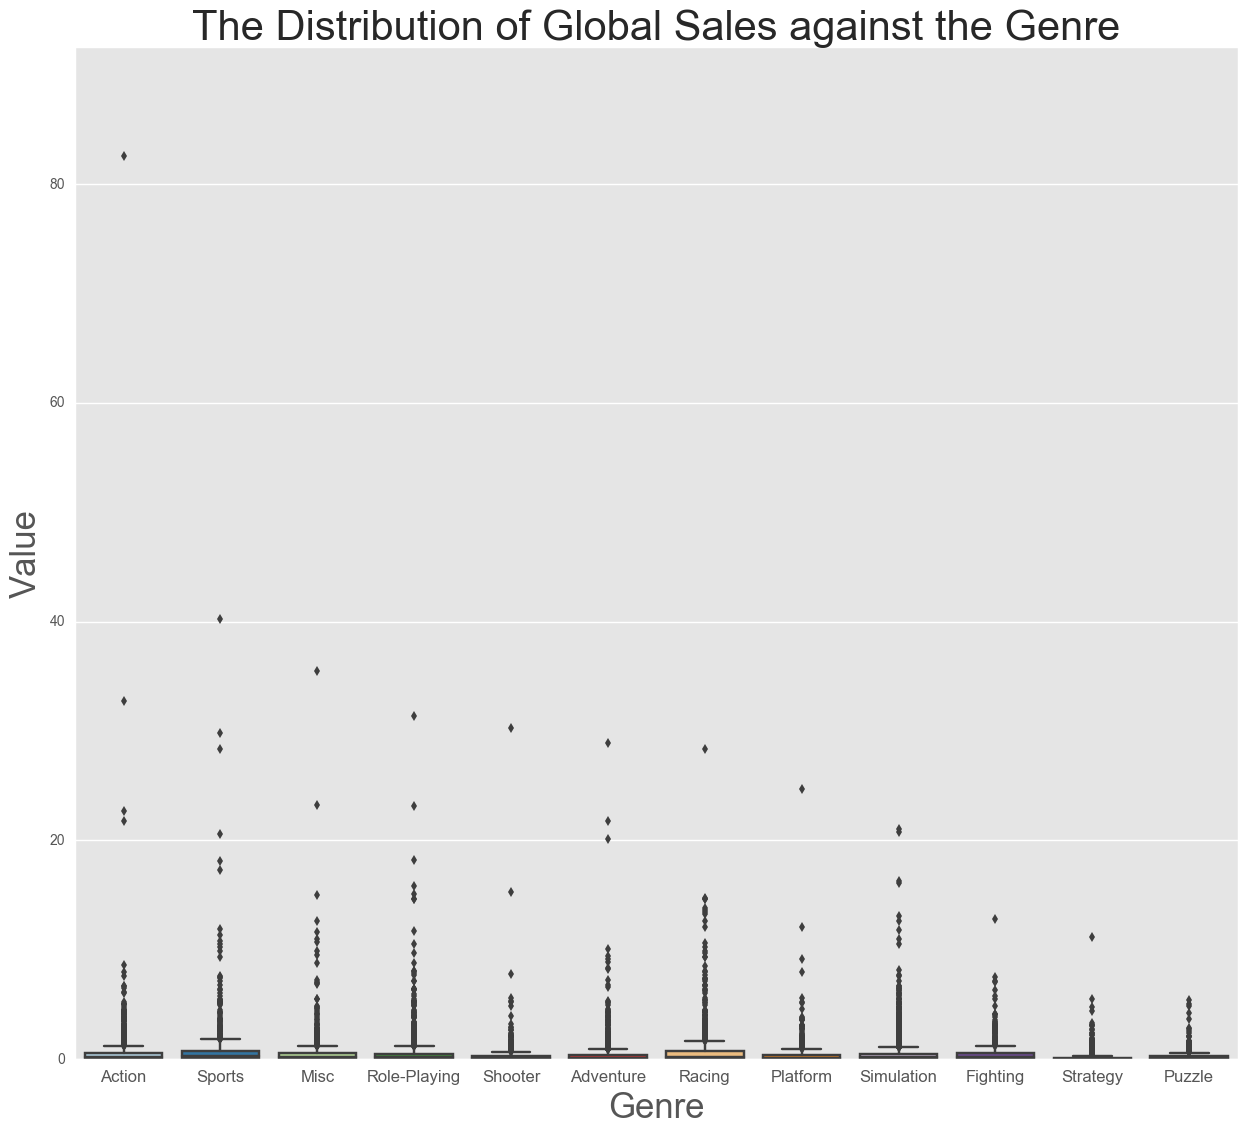

In [4]:
## Column: Genre
print(games.Genre[:100])
print(games.Genre.value_counts())

# Visualization: bar plot on count of Genres
genre_name = list(games.Genre.value_counts().index)
genre_count = list(games.Genre.value_counts().values)

import matplotlib
matplotlib.style.use('ggplot')  
fig, axes = plt.subplots(figsize=[15, 15])
axes.bar(list(range(len(genre_name))), genre_count, color='#2E8B57', width=0.8)
axes.tick_params(labelsize=15)
axes.set_xticks(np.arange(len(genre_name))+0.4)
axes.set_xticklabels(genre_name, fontsize=15)
axes.set_xlabel('Genre', fontsize=25)
axes.set_ylabel('Count', fontsize=25)
axes.set_ylim(0, max(genre_count)+100)
axes.set_title('Count for each Genre', fontsize=30, loc='center')
#fig.suptitle('', fontsize=30, y=0.88, horizontalalignment='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
plt.savefig('Count_for_each_Genre.png', dpi=300)

# Visualization: bar plot on ratio of Genres
genre_name = list(games.Genre.value_counts().index)
genre_perc = pd.DataFrame(games.Genre.value_counts()).apply(lambda x: (x/np.sum(x))*100, axis=0).values.ravel()

import matplotlib
matplotlib.style.use('ggplot')  
fig, axes = plt.subplots(figsize=[15, 15])
axes.bar(list(range(len(genre_name))), genre_perc, color='#2E8B57', width=0.8)
axes.tick_params(labelsize=15)
axes.set_xticks(np.arange(len(genre_name))+0.4)
axes.set_xticklabels(genre_name, fontsize=15)
axes.set_xlabel('Genre', fontsize=25)
axes.set_ylabel('Percentage', fontsize=25)
axes.set_ylim(0, max(genre_perc)+10)
axes.set_title('Percentage for each Genre', fontsize=30, loc='center')
#fig.suptitle('', fontsize=30, y=0.88, horizontalalignment='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
plt.savefig('Percentage_for_each_Genre.png', dpi=300)

# Visualization: games' genre for PC, PS3, and PSV
# platform name
plat_type = ['PC', 'PS3', 'PSV']

games_plat = games.groupby(['Platform'])

genre_index = list(games['Genre'].value_counts().index)

genre_plat_df = pd.DataFrame(columns=plat_type, index=genre_index)
for plat in plat_type:
    genre_plat_df[plat] = games_plat['Genre'].value_counts()[plat]

genre_plat_df.fillna(0)

genre_plat_perc = genre_plat_df.apply(lambda x: x/np.sum(x)*100, axis=0)

plt.figure(figsize=[20, 20])
genre_plat_perc.transpose().plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0) # rot=0 makes the 
# ticklabels in x-axis to be rotated
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Genre Change by Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.ylim([0, 100])
plt.savefig('Genre_change_by_platform.png', dpi=300)

# Hypothesis: Genres are related with Sales (Global)
# Visualization: boxplot on each genre
fig, axes = plt.subplots(figsize=[15, 15])
sns.set_style("whitegrid")
#axes.tick_params(labelsize=20)
sns.boxplot(x='Genre', y='Global_Sales', data=games, palette='Paired', orient="v")
axes.set_xlabel('Genre', fontsize=25)
axes.set_ylabel('Value', fontsize=25)
axes.set_xticklabels(list(games.Genre.value_counts().index), fontsize=12)
axes.set_ylim([0, games.Global_Sales.values.max()+10])
axes.set_title('The Distribution of Global Sales against the Genre', fontsize=30, loc='center')
#fig.suptitle('Age Distribution Against the Membership type', fontsize=30, y=0.88, horizontalalignment='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
plt.savefig('Global_sales_distribution_against_genre.png', dpi=300)

In [5]:
## Column: Genre
# Hypothesis: Genres are related with Sales (Global)
# Anova 
from scipy.stats import f_oneway
genre_type = list(games.Genre.value_counts().index)
genre_sales = []

for genre in genre_type:
    genre_sales.append(games.ix[games['Genre']==genre, ['Global_Sales']].values)

#print(len(genre_sales))    
print(f_oneway(*genre_sales))
# conclusion: genre would affect the global sales

# Kruskal-Wallis H-test
from scipy.stats import kruskal
print(kruskal(*genre_sales))
# conclusion: genre would affect the global sales

# Significant, but we don't know which genre would affect the global sales

F_onewayResult(statistic=array([ 18.74738473]), pvalue=array([  6.77068693e-38]))
KruskalResult(statistic=995.87290090358783, pvalue=1.4835691606654862e-206)


0    Nintendo
1    Nintendo
2    Nintendo
3    Nintendo
4    Nintendo
5    Nintendo
6    Nintendo
7    Nintendo
8    Nintendo
9    Nintendo
Name: Publisher, dtype: object
Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Midway Games                  

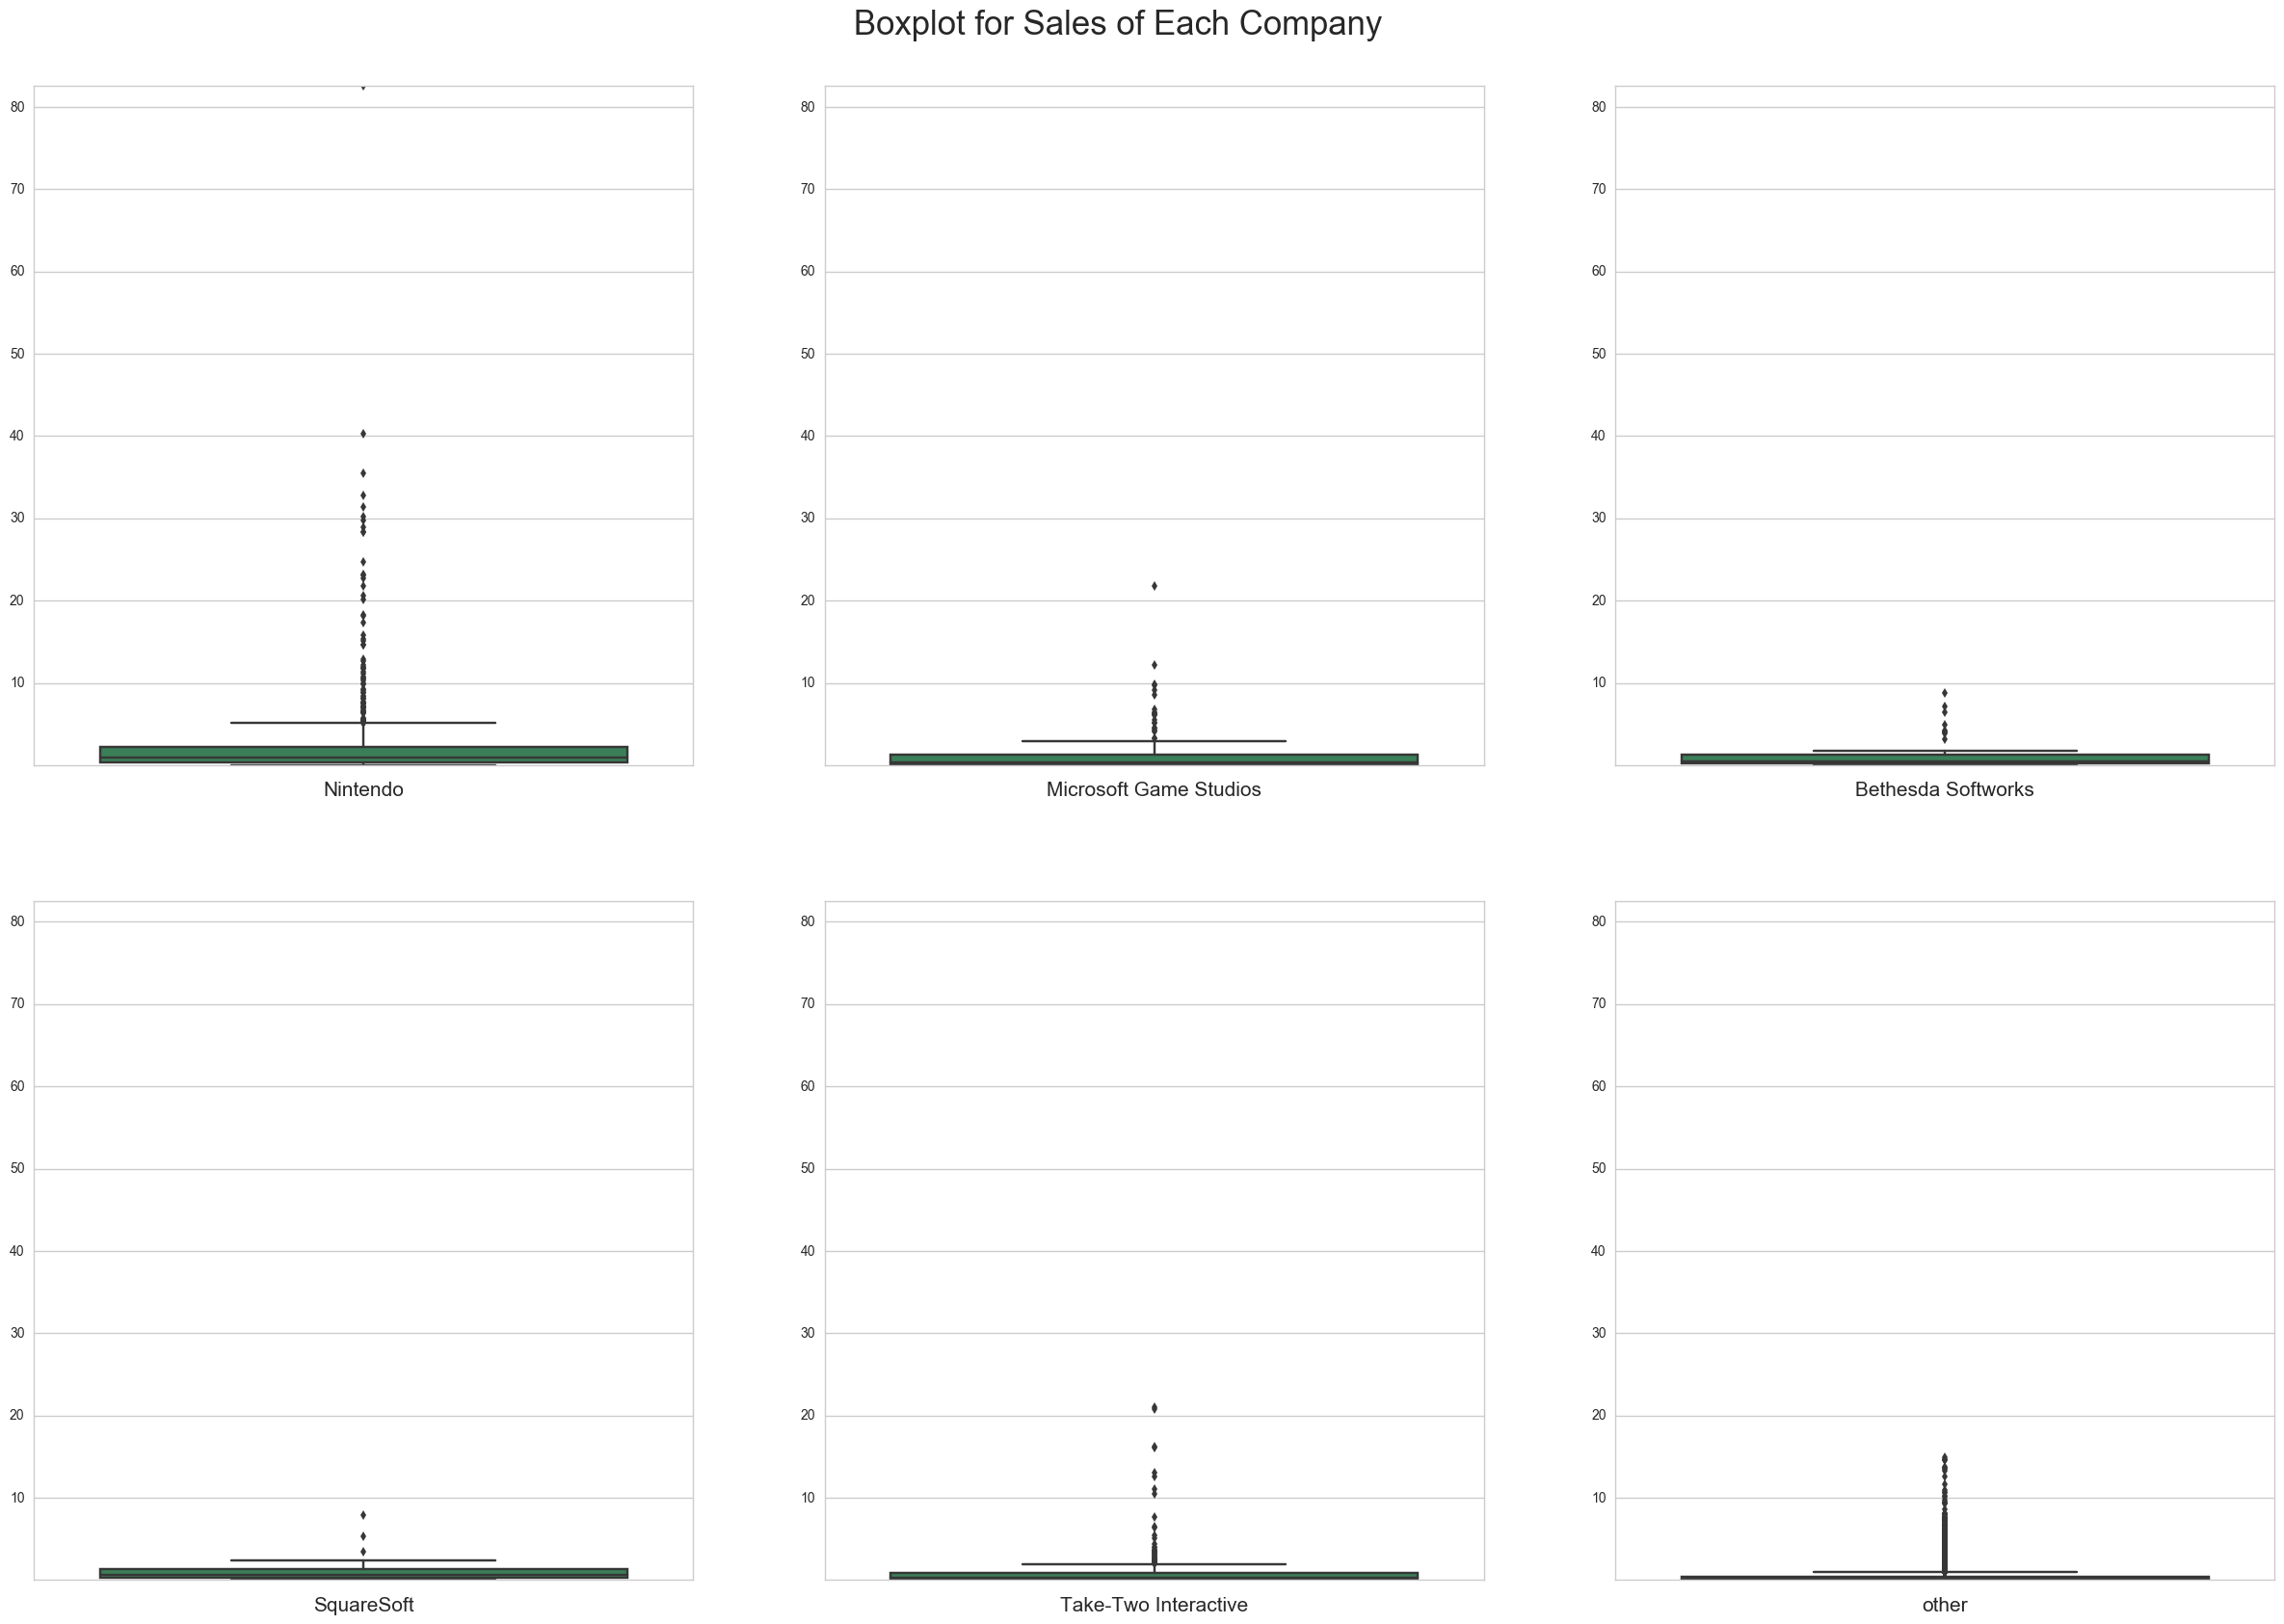

In [117]:
## Column: Publisher
## Column: Genre
print(games.Publisher[:10])
print(games.Publisher.value_counts())

# Visualization: bar plot on average global sales of each Publisher
games_publisher_sales = games.groupby(['Publisher'])['Global_Sales']
# top five companies of highest average sales
print(games_publisher_sales.mean().sort_values(ascending=False)) 
# filter out companies with too few games released
# length of unique years
print(np.unique(games['Year_of_Release']))
unique_yr = [x for x in np.unique(games['Year_of_Release']) if not np.isnan(x)]
print(len(unique_yr)) # 39 unique years 
large_company_names = np.array(list(games_publisher_sales.count().sort_values(ascending=False).index))[games_publisher_sales.count().sort_values(ascending=False).values>=39]
games_large_company = games.ix[games['Publisher'].isin(large_company_names), :]
print(games_large_company.head())
print(games_large_company.shape)
games_large_publisher_sales = games_large_company.groupby(['Publisher'])['Global_Sales']
print(games_large_publisher_sales.mean().sort_values(ascending=False))

# Visualization and statistical test on if the company would affect the global sales
top5_company_names = list(games_large_publisher_sales.mean().sort_values(ascending=False).index[:5])
other_company = [x for x in list(games['Publisher'].value_counts().index) if not x in top5_company_names]
top5_company_names = [[x] for x in top5_company_names]
top5_company_names.append(other_company)

publisher_sales = []
for publisher in top5_company_names:
    publisher_sales.append(games.ix[games['Publisher'].isin(publisher), ['Global_Sales']].values.ravel())
print(len(publisher_sales))
col_name = [x[0] for x in top5_company_names[:5]]
col_name.append('other')
#publisher_sales_df = pd.DataFrame(columns=col_name, index=list(range(len(publisher_sales[5]))))

flatten_publisher_sales = []
for li in publisher_sales:
    flatten_publisher_sales.extend(li)

fig = plt.figure(figsize=(30, 20))  
plt.suptitle('Boxplot for Sales of Each Company', fontsize=25, y=0.94)
for (i, company) in enumerate(col_name, start=1):
    axes = fig.add_subplot(2, 3, i)
    axes.tick_params(labelsize=10)
    sns.boxplot(publisher_sales[i-1], ax=axes, color='#2E8B57', orient='v')
    axes.set_xlabel(company, fontsize=15)
    axes.set_ylim([min(flatten_publisher_sales), max(flatten_publisher_sales)])
plt.savefig('Boxplot_for_sales_of_each_company.png', dpi=300)
    
#print(len(genre_sales))    
print(f_oneway(*publisher_sales))
# conclusion: company would affect the global sales

# Kruskal-Wallis H-test
from scipy.stats import kruskal
print(kruskal(*publisher_sales))
# conclusion: company would affect the global sales

# Significant, but we don't know which company would affect the global sales

In [118]:
## Column: Critic_Score